In [177]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yaml

In [178]:
dat = pd.read_csv('~/Documents/PhD/Projects/10. ELECSIM/elecsim/data/raw/electricity_mix/electricity_mix.csv')
dat.head()

FileNotFoundError: [Errno 2] File b'/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/elecsim/data/raw/electricity_mix/electricity_mix.csv' does not exist: b'/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/elecsim/data/raw/electricity_mix/electricity_mix.csv'

In [ ]:
dat.columns = dat.columns.str.replace(" ", "")
dat.columns

In [ ]:
dat.timestamp = pd.to_datetime(dat.timestamp)
dat.head()

In [ ]:
dat = dat.drop(columns=['pumped', 'french_ict', 'dutch_ict', 'irish_ict', 'ew_ict', 'nemo', 'other', 'north_south', 'scotland_england'])
dat.head()

In [ ]:
dat['year'] = dat.timestamp.dt.year
dat.head()

In [ ]:
mean_dat = dat.groupby('year').mean()
mean_dat.head()

In [ ]:
mean_long_dat = pd.melt(mean_dat.drop(columns=['id','demand','frequency']).reset_index(), id_vars='year')
mean_long_dat.head()

In [173]:
sns.lineplot(data=mean_long_dat, x='year', y='value', hue='variable')

mean_long_dat.to_csv('~/Desktop/energy_mix_historical.csv')

NameError: name 'mean_long_dat' is not defined

In [20]:
hourly_dat = pd.read_csv('~/Documents/PhD/Projects/10. ELECSIM/test/test_new/demand_none-carbon_none-datetime_2019-07-08_18-26-06-capacity_52152.csv')
hourly_dat.head()

,Unnamed: 0,contributed_CCGT,contributed_Coal,contributed_Onshore,contributed_Offshore,contributed_PV,contributed_Nuclear,contributed_Recip_gas,hourly_accepted_bids,total_CCGT,total_Coal,total_Onshore,total_Offshore,total_PV,total_Nuclear,total_Recip_gas,Carbon_tax,total_genco_wealth,Electricity_cost,Carbon_emitted
0,0,418147.92,207262.82,88993.266144,76035.947905,3291.676233,217924.08,8577.225,"[{'plant_type': 'Recip_gas', 'segment_hours': ...",31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,23.62,2.614771e+10,78.67035,1342.506012


In [46]:
import yaml
extracted_dataframe = pd.DataFrame(yaml.load(hourly_dat.hourly_accepted_bids.iloc[0]))

In [50]:
extracted_dataframe.head()

,capacity_bid,plant_type,segment_hours
0,523.8,Recip_gas,55.0
1,523.8,Recip_gas,110.0
2,523.8,Recip_gas,165.0
3,523.8,Recip_gas,220.0
4,523.8,Recip_gas,275.0


In [88]:
mix = extracted_dataframe.groupby(['plant_type', 'segment_hours'])['capacity_bid'].sum().reset_index()
mix.head(30)

,plant_type,segment_hours,capacity_bid
0,Biomass_meat,55.0,13.580
1,Biomass_meat,110.0,13.580
2,Biomass_meat,165.0,13.580
3,Biomass_meat,220.0,13.580
4,Biomass_meat,275.0,13.580
5,Biomass_meat,330.0,13.580
6,Biomass_meat,385.0,13.580
7,Biomass_meat,440.0,13.580
8,Biomass_meat,495.0,13.580
9,Biomass_meat,550.0,13.580


In [103]:
import numpy as np
mix_ontop = mix.groupby("segment_hours").apply(lambda x: x.groupby('plant_type').apply(lambda x: x.reset_index()['capacity_bid']).cumsum()).reset_index()
mix_ontop

capacity_bid,segment_hours,plant_type,0
0,55.0,Biomass_meat,13.580000
1,55.0,Biomass_poultry_litter,79.831000
2,55.0,Biomass_straw,116.691000
3,55.0,Biomass_wood,2251.661000
4,55.0,CCGT,25201.001000
5,55.0,Coal,36636.251000
6,55.0,EfW,37124.646000
7,55.0,Hydro,37765.169592
8,55.0,Nuclear,46845.339592
9,55.0,OCGT,47300.595592


In [162]:
def assign_index(x):
    try:
        x['order'] = np.array(['18', '17', '19', '20', '16', '12', '11', '10', '13', '14', '9', '15',
       '8', '21', '22', '7', '23', '0', '1', '6', '2', '3', '4', '5'])
        x['order'] = pd.to_numeric(x['order'])
        return x
    except:
        pass


mix_reordered = mix_ontop.groupby('plant_type').apply(lambda x: assign_index(x))
# mix_reordered.sort_values(by='order')
mix_reordered.head()



capacity_bid     segment_hours    plant_type      0  order
plant_type                                                
Biomass_meat 0            55.0  Biomass_meat  13.58     18
             15          110.0  Biomass_meat  13.58     17
             28          165.0  Biomass_meat  13.58     19
             41          220.0  Biomass_meat  13.58     20
             55          275.0  Biomass_meat  13.58     16

Text(0.5, 0, 'hour of the day')

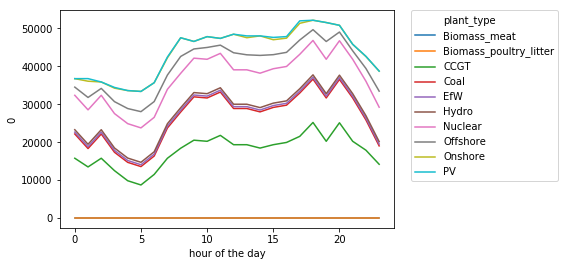

In [169]:
sns.lineplot(data=mix_reordered, x='order', y=0, hue='plant_type')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('hour of the day')


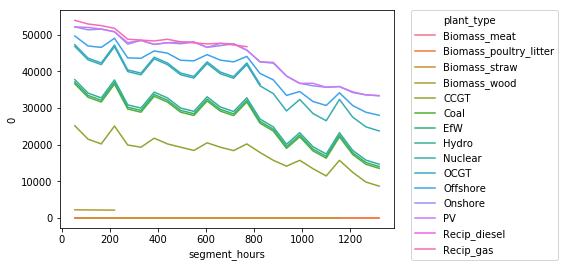

In [101]:
sns.lineplot(data = mix_ontop, x='segment_hours', y=0, hue='plant_type')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

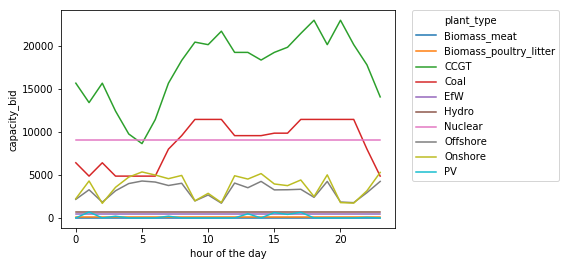

In [168]:
mix_reordered_not_ontop = mix.groupby('plant_type').apply(lambda x: assign_index(x))

# sns.lineplot(data=mix_reordered_not_ontop, x='segment_hours', y="capacity_bid", hue="plant_type")
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

sns.lineplot(data=mix_reordered_not_ontop, x='order', y="capacity_bid", hue='plant_type')
plt.xlabel('hour of the day')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [166]:
mix_reordered_not_ontop

plant_type  segment_hours  \
plant_type                                                          
Biomass_meat           0              Biomass_meat           55.0   
                       1              Biomass_meat          110.0   
                       2              Biomass_meat          165.0   
                       3              Biomass_meat          220.0   
                       4              Biomass_meat          275.0   
                       5              Biomass_meat          330.0   
                       6              Biomass_meat          385.0   
                       7              Biomass_meat          440.0   
                       8              Biomass_meat          495.0   
                       9              Biomass_meat          550.0   
                       10             Biomass_meat          605.0   
                       11             Biomass_meat          660.0   
                       12             Biomass_meat          715.0   
                       13             Biomass_meat          770.0   
                       14             Biomass_meat          825.0   
                       15             Biomass_meat          880.0   
                       16             Biomass_meat          935.0   
                       17             Biomass_meat          990.0   
                       18             Biomass_meat         1045.0   
                       19             Biomass_meat         1100.0   
                       20             Biomass_meat         1155.0   
                       21             Biomass_meat         1210.0   
                       22             Biomass_meat         1265.0   
                       23             Biomass_meat         1320.0   
Biomass_poultry_litter 24   Biomass_poultry_litter           55.0   
                       25   Biomass_poultry_litter          110.0   
                       26   Biomass_poultry_litter          165.0   
                       27   Biomass_poultry_litter          220.0   
                       28   Biomass_poultry_litter          275.0   
                       29   Biomass_poultry_litter          330.0   
...                                            ...            ...   
Onshore                246                 Onshore         1045.0   
                       247                 Onshore         1100.0   
                       248                 Onshore         1155.0   
                       249                 Onshore         1210.0   
                       250                 Onshore         1265.0   
                       251                 Onshore         1320.0   
PV                     252                      PV           55.0   
                       253                      PV          110.0   
                       254                      PV          165.0   
                       255                      PV          220.0   
                       256                      PV          275.0   
                       257                      PV          330.0   
                       258                      PV          385.0   
                       259                      PV          440.0   
                       260                      PV          495.0   
                       261                      PV          550.0   
                       262                      PV          605.0   
                       263                      PV          660.0   
                       264                      PV          715.0   
                       265                      PV          770.0   
                       266                      PV          825.0   
                       267                      PV          880.0   
                       268                      PV          935.0   
                       269                      PV          990.0   
                       270                      PV         1045.0   
                       271            

In [172]:
ten_year = pd.read_csv('~/Documents/PhD/Projects/10. ELECSIM/test/test_new/demand_none-carbon_none-datetime_2019-07-09_09-39-45-capacity_52152.csv')
ten_year


,Unnamed: 0,contributed_CCGT,contributed_Coal,contributed_Onshore,contributed_Offshore,contributed_PV,contributed_Nuclear,contributed_Recip_gas,total_CCGT,total_Coal,total_Onshore,total_Offshore,total_PV,total_Nuclear,total_Recip_gas,Carbon_tax,total_genco_wealth,Electricity_cost,Carbon_emitted
0,0,442729.44,177471.13,88993.266144,76035.947905,3.291676e+03,217924.08,13432.075,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,23.62,2.723127e+10,81.482356,1336.756105
1,1,191727.60,78941.54,100898.866442,82930.634617,1.139483e+04,217924.08,0.000,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,23.62,2.189050e+10,58.323130,565.357022
2,2,354648.96,171973.52,78216.415445,65331.004670,5.683637e+03,217924.08,3854.295,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,23.62,2.904272e+10,65.969276,1121.432794
3,3,225299.04,179174.37,85862.339992,79367.849047,7.768074e+03,217924.08,0.000,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,23.62,2.234831e+10,58.477654,857.166382
4,4,427831.20,195733.56,87923.852784,76035.947905,3.291676e+03,217924.08,9224.700,31912.0,14475.0,8756.1,6983.8,3377.8,9361.0,670.0,23.62,-1.847036e+10,84.955530,1338.722457
5,5,232524.96,37540.80,99686.385987,82930.634617,1.139483e+04,217924.08,0.000,31912.0,14475.0,8756.1,6983.8,3377.8,9361.0,670.0,23.62,-2.017361e+10,61.397422,555.794135
6,6,357814.08,173948.52,77276.505233,65331.004670,5.683637e+03,217924.08,4549.300,31912.0,14475.0,8756.1,6983.8,3377.8,9361.0,670.0,23.62,-4.804522e+09,69.966683,1132.940528
7,7,341370.72,64879.54,84830.550313,79367.849047,7.768074e+03,217924.08,0.000,31912.0,14475.0,8756.1,6983.8,3377.8,9361.0,670.0,23.62,1.215165e+09,65.967984,841.404106
8,8,423726.48,197206.91,87660.767056,76035.947905,3.291676e+03,217924.08,7798.800,31912.0,14475.0,8729.9,6983.8,3377.8,9361.0,670.0,23.62,2.893048e+10,84.449291,1329.858758
9,9,196551.00,70607.04,99388.104411,82930.634617,1.139483e+04,217924.08,0.000,31912.0,14475.0,8729.9,6983.8,3377.8,9361.0,670.0,23.62,2.843817e+10,60.594222,556.550938
